In [1]:
import os

ROOT_DATA = os.environ.get('LARD_DATA_ROOT_PATH')
ROOT_PROJECT = os.environ.get('LARD_PROJECT_ROOT_PATH')

print(ROOT_DATA)
print(ROOT_PROJECT)


/fileonssd/runway-dataset/lard-dataset
/home/yeli/workspace/lard/lard-detection


['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


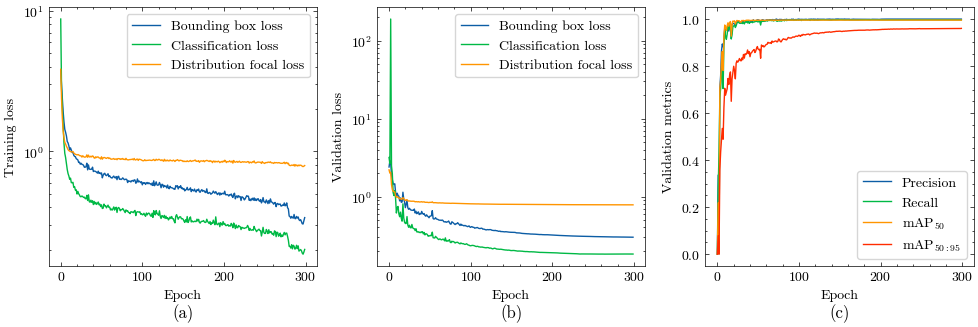

In [7]:
import sys
import matplotlib.pyplot as plt
import scienceplots
sys.path.append('/home/yeli/workspace/lard/lard-detection/')
from src.utils.read import read_ultrlytics_train_log_csv


plt.style.use('science')
plt.rcParams['text.usetex'] = False


# 读取日志
train_log_path = f'{ROOT_PROJECT}/runs/ultralytics/merge/yolov8n_lska_bifpn_EIoU_aug_all_5_640/train/results.csv'
df_train_val = read_ultrlytics_train_log_csv(train_log_path)

# 绘图
_, axes = plt.subplots(1, 3, figsize=(10, 3.5), dpi=100)
axes = axes.flatten()

axes[0].plot(df_train_val.index, df_train_val['train/box_loss'], label='Bounding box loss')
axes[0].plot(df_train_val.index, df_train_val['train/cls_loss'], label='Classification loss')
axes[0].plot(df_train_val.index, df_train_val['train/dfl_loss'], label='Distribution focal loss')
axes[0].legend(loc='upper right', frameon=True)

axes[1].plot(df_train_val.index, df_train_val['val/box_loss'], label='Bounding box loss')
axes[1].plot(df_train_val.index, df_train_val['val/cls_loss'], label='Classification loss')
axes[1].plot(df_train_val.index, df_train_val['val/dfl_loss'], label='Distribution focal loss')
axes[1].legend(loc='upper right', frameon=True)

axes[2].plot(df_train_val.index, df_train_val['metrics/precision(B)'], label='Precision')
axes[2].plot(df_train_val.index, df_train_val['metrics/recall(B)'], label='Recall')
axes[2].plot(df_train_val.index, df_train_val['metrics/mAP50(B)'], label='mAP$_{50}$')
axes[2].plot(df_train_val.index, df_train_val['metrics/mAP50-95(B)'], label='mAP$_{50:95}$')
axes[2].legend(loc='lower right', frameon=True)

axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_xlabel('Epoch')
axes[1].set_xlabel('Epoch')
axes[2].set_xlabel('Epoch')

axes[0].set_ylabel('Training loss')
axes[1].set_ylabel('Validation loss')
axes[2].set_ylabel('Validation metrics')

axes[0].set_title('(a)', y=-0.23)
axes[1].set_title('(b)', y=-0.23)
axes[2].set_title('(c)', y=-0.23)

plt.tight_layout()
plt.savefig(
        f'{ROOT_PROJECT}/results/figs/paper/training_of_proposed.svg',
        dpi=600, bbox_inches='tight')  # pad_inches=0.0
plt.show()

['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


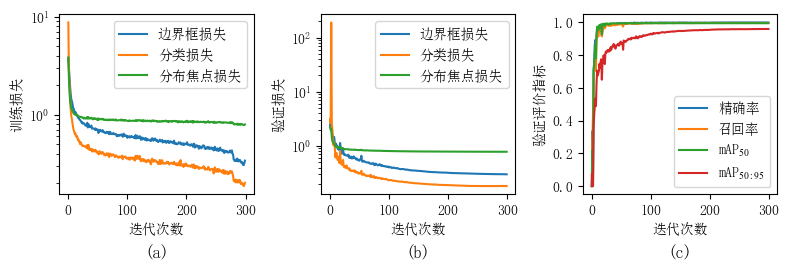

In [30]:
import sys
import matplotlib.pyplot as plt
sys.path.append('/home/yeli/workspace/lard/lard-detection/')
from src.utils.read import read_ultrlytics_train_log_csv


plt.rcParams['font.sans-serif'] = ['SimSun']
plt.rcParams["mathtext.rm"] = "Times New Roman"
plt.rcParams['axes.unicode_minus'] = False


# 读取日志
train_log_path = f'{ROOT_PROJECT}/runs/ultralytics/merge/yolov8n_lska_bifpn_EIoU_aug_all_5_640/train/results.csv'
df_train_val = read_ultrlytics_train_log_csv(train_log_path)

# 绘图
_, axes = plt.subplots(1, 3, figsize=(8, 3), dpi=100)
axes = axes.flatten()

axes[0].plot(df_train_val.index, df_train_val['train/box_loss'], label='边界框损失')
axes[0].plot(df_train_val.index, df_train_val['train/cls_loss'], label='分类损失')
axes[0].plot(df_train_val.index, df_train_val['train/dfl_loss'], label='分布焦点损失')
axes[0].legend(loc='upper right', frameon=True)

axes[1].plot(df_train_val.index, df_train_val['val/box_loss'], label='边界框损失')
axes[1].plot(df_train_val.index, df_train_val['val/cls_loss'], label='分类损失')
axes[1].plot(df_train_val.index, df_train_val['val/dfl_loss'], label='分布焦点损失')
axes[1].legend(loc='upper right', frameon=True)

axes[2].plot(df_train_val.index, df_train_val['metrics/precision(B)'], label='精确率')
axes[2].plot(df_train_val.index, df_train_val['metrics/recall(B)'], label='召回率')
axes[2].plot(df_train_val.index, df_train_val['metrics/mAP50(B)'], label='mAP$_{50}$')
axes[2].plot(df_train_val.index, df_train_val['metrics/mAP50-95(B)'], label='mAP$_{50:95}$')
axes[2].legend(loc='lower right', frameon=True)

axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_xlabel('迭代次数')
axes[1].set_xlabel('迭代次数')
axes[2].set_xlabel('迭代次数')

axes[0].set_ylabel('训练损失')
axes[1].set_ylabel('验证损失')
axes[2].set_ylabel('验证评价指标')

axes[0].set_title('(a)', y=-0.4)
axes[1].set_title('(b)', y=-0.4)
axes[2].set_title('(c)', y=-0.4)

plt.tight_layout()
plt.savefig(
    'training_of_proposed.jpg',
    dpi=600, bbox_inches='tight')  # pad_inches=0.0
plt.show()